In [1]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm_notebook as progress

### Problem 3

In [6]:
def wigner_matrix(n=5,diag_scale=1):
    vals = norm.rvs(size=n*n)
    m = np.triu(vals.reshape((n,n)),1)
    d = np.diag(norm.rvs(scale=diag_scale,size=n))
    return m+m.T+d

In [8]:
W = wigner_matrix(1000)
W_ = np.divide(W,np.sqrt(1000))
u,_ = np.linalg.eig(W_)

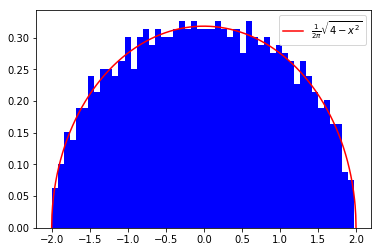

In [9]:
import matplotlib.pyplot as plt

plt.hist(u,bins=50,color='blue',density=True)

x = np.linspace(-2,2,1000)
y = np.sqrt(4-np.power(x,2))/(2*np.pi)
plt.plot(x,y,color='red',label=r'$\frac{1}{2\pi}\sqrt{4-x^2}$')
plt.legend()
plt.show()

### Problem 5

In [60]:
def getLargestEigenval(beta,N=1000):
    W = wigner_matrix(n=N)
    v = np.zeros(N).reshape((N,1))
    v[0,0]=1
    M = np.divide(W,np.sqrt(N)) + beta*np.dot(v,v.T)
    u,_ = np.linalg.eig(M)
    return np.max(u)

In [65]:
SAMPLES=500
betas = np.zeros(SAMPLES)
leading_eigenvals = np.zeros(SAMPLES)
for x in progress(range(SAMPLES)):
    beta = np.random.random()*5 # random number from 0 to 10
    betas[x] = beta
    leading_eigenvals[x] = getLargestEigenval(beta)

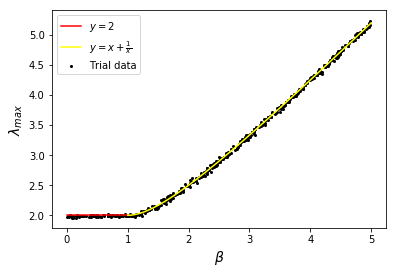

In [91]:
plt.scatter(betas,leading_eigenvals,c='k',s=4,label='Trial data')
plt.plot([0,1],[2,2],color='red',label=r'$y=2$')
x_ = np.linspace(1,5,200)
y_ = x_ + 1/x_
plt.plot(x_,y_,color='yellow',label=r'$y=x + \frac{1}{x}$')
plt.xlabel(r'$\beta$',fontsize=14)
plt.ylabel(r'$\lambda_{max}$',fontsize=14)
plt.legend()
plt.show()

### Problem 6

In [129]:
n=40
# make adjacency matrix for ring network with n nodes
vals = np.ones(n-1)
A = np.diag(vals,1)
A[n-1,0] = 1

# make bidirectional
A = A + A.T

# convert to random walk probabilities
sums = np.sum(A,axis=0)
A = np.divide(A,sums)
d = np.diag(np.ones(n)*0.5,0)
P = np.dot(d,A) + d
print(P)
# perform svd and get first two dimensions
#  skips u[:,0] because that eigenvector is just a multiple of the 1-vector
u,singular_values,_ = np.linalg.svd(P)
x = u[:,1]
y = u[:,2]
print(singular_values)

[[0.5  0.25 0.   ... 0.   0.   0.25]
 [0.25 0.5  0.25 ... 0.   0.   0.  ]
 [0.   0.25 0.5  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.5  0.25 0.  ]
 [0.   0.   0.   ... 0.25 0.5  0.25]
 [0.25 0.   0.   ... 0.   0.25 0.5 ]]
[1.00000000e+00 9.93844170e-01 9.93844170e-01 9.75528258e-01
 9.75528258e-01 9.45503262e-01 9.45503262e-01 9.04508497e-01
 9.04508497e-01 8.53553391e-01 8.53553391e-01 7.93892626e-01
 7.93892626e-01 7.26995250e-01 7.26995250e-01 6.54508497e-01
 6.54508497e-01 5.78217233e-01 5.78217233e-01 5.00000000e-01
 5.00000000e-01 4.21782767e-01 4.21782767e-01 3.45491503e-01
 3.45491503e-01 2.73004750e-01 2.73004750e-01 2.06107374e-01
 2.06107374e-01 1.46446609e-01 1.46446609e-01 9.54915028e-02
 9.54915028e-02 5.44967379e-02 5.44967379e-02 2.44717419e-02
 2.44717419e-02 6.15582970e-03 6.15582970e-03 1.01200326e-17]


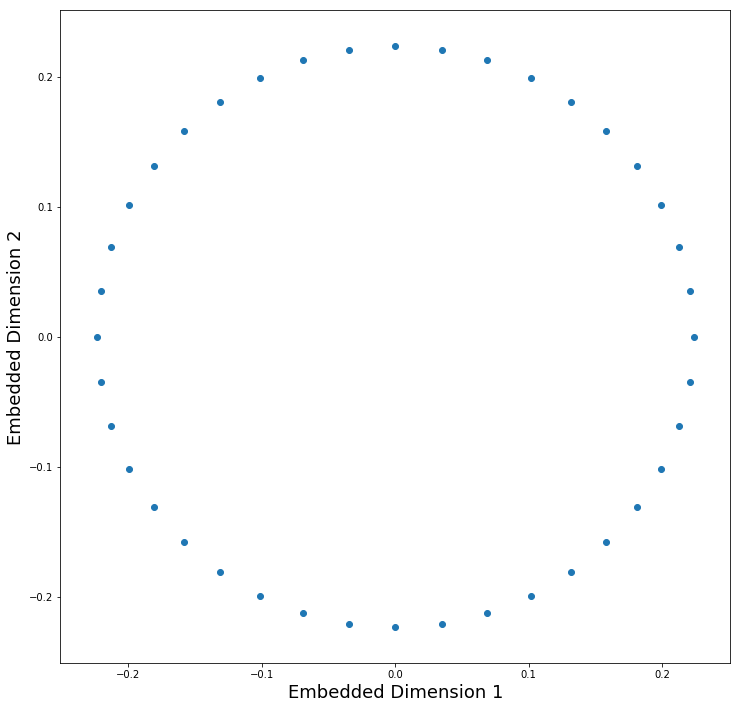

In [136]:
fig = plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.xlabel('Embedded Dimension 1',fontsize=18)
plt.ylabel('Embedded Dimension 2',fontsize=18)
plt.show()